# Overview of Notebooks

* [HAPI_00.ipynb](HAPI_00.ipynb) - Introduction
* [HAPI_01.ipynb](HAPI_01.ipynb) - Basics
* **[HAPI_02.ipynb](HAPI_02.ipynb) - Data structures (this Notebook)**
* [HAPI_03.ipynb](HAPI_03.ipynb) - Plotting
* [HAPI_04.ipynb](HAPI_04.ipynb) - Problems

# Setup

In [1]:
# Have Matplotlib create vector (svg) instead of raster (png) images
%config InlineBackend.figure_formats = ['svg']

# Data Model

A request for data using

```python
data, meta = hapi(server, dataset, parameters, start, stop)
```

returns the [NumPy `ndarray` with named fields](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html) `data` and a Python dictionary `meta` by making requests to a HAPI-compliant data server `server`. The structure of `meta` mirrors the structure of the JSON metadata response from a HAPI server.

Internally, `hapi()` makes a request to a HAPI server, which returns a CSV stream in which the first column is a timestamp, and subsequent columns are data measured or associated with that timestamp. The columns are mapped to one or more parameters (that may be multi-dimensional arrays) using the metadata associated with the request for CSV data. Note that `hapi()` requests a much faster HAPI Binary stream from a server if possible. For more information on the HAPI server specification, see https://github.com/hapi-server/data-specification. 

# Extracting Data

In [2]:
from hapiclient import hapi

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data,meta = hapi(server,dataset,parameters,start,stop,**opts)

`data` is a NumPy `ndarray` with named fields of `Time`, `scalar`, and `vector`. The array has 10 elements (one for each time value) and each element is a list.

In [3]:
data

array([(b'1970-01-01T00:00:00.000Z', 0.        , [ 0.        , -0.70710678, -1.        ]),
       (b'1970-01-01T00:00:01.000Z', 0.00523596, [ 0.00523596, -0.7033947 , -0.99998629]),
       (b'1970-01-01T00:00:02.000Z', 0.01047178, [ 0.01047178, -0.69966334, -0.99994517]),
       (b'1970-01-01T00:00:03.000Z', 0.01570732, [ 0.01570732, -0.6959128 , -0.99987663]),
       (b'1970-01-01T00:00:04.000Z', 0.02094242, [ 0.02094242, -0.69214317, -0.99978068]),
       (b'1970-01-01T00:00:05.000Z', 0.02617695, [ 0.02617695, -0.68835458, -0.99965732]),
       (b'1970-01-01T00:00:06.000Z', 0.03141076, [ 0.03141076, -0.68454711, -0.99950656]),
       (b'1970-01-01T00:00:07.000Z', 0.03664371, [ 0.03664371, -0.68072087, -0.99932839]),
       (b'1970-01-01T00:00:08.000Z', 0.04187565, [ 0.04187565, -0.67687597, -0.99912283]),
       (b'1970-01-01T00:00:09.000Z', 0.04710645, [ 0.04710645, -0.67301251, -0.99888987])],
      dtype=[('Time', 'S24'), ('scalar', '<f8'), ('vector', '<f8', (3,))])

Access all values for parameter `Time`

In [4]:
data['Time']

array([b'1970-01-01T00:00:00.000Z', b'1970-01-01T00:00:01.000Z',
       b'1970-01-01T00:00:02.000Z', b'1970-01-01T00:00:03.000Z',
       b'1970-01-01T00:00:04.000Z', b'1970-01-01T00:00:05.000Z',
       b'1970-01-01T00:00:06.000Z', b'1970-01-01T00:00:07.000Z',
       b'1970-01-01T00:00:08.000Z', b'1970-01-01T00:00:09.000Z'],
      dtype='|S24')

Convert elements of `data['Time']` to Python `datetime` objects

In [5]:
from hapiclient import hapitime2datetime
dateTimes = hapitime2datetime(data['Time'])
dateTimes

array([datetime.datetime(1970, 1, 1, 0, 0, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 1, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 2, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 3, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 4, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 5, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 6, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 7, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 8, tzinfo=<UTC>),
       datetime.datetime(1970, 1, 1, 0, 0, 9, tzinfo=<UTC>)], dtype=object)

Convert elements in `data['Time']` to Unicode strings 

In [6]:
TimeStamps = data['Time'].astype('U')
TimeStamps

array(['1970-01-01T00:00:00.000Z', '1970-01-01T00:00:01.000Z',
       '1970-01-01T00:00:02.000Z', '1970-01-01T00:00:03.000Z',
       '1970-01-01T00:00:04.000Z', '1970-01-01T00:00:05.000Z',
       '1970-01-01T00:00:06.000Z', '1970-01-01T00:00:07.000Z',
       '1970-01-01T00:00:08.000Z', '1970-01-01T00:00:09.000Z'],
      dtype='<U24')

Access all values for parameter `vector`

In [7]:
data['vector']

array([[ 0.        , -0.70710678, -1.        ],
       [ 0.00523596, -0.7033947 , -0.99998629],
       [ 0.01047178, -0.69966334, -0.99994517],
       [ 0.01570732, -0.6959128 , -0.99987663],
       [ 0.02094242, -0.69214317, -0.99978068],
       [ 0.02617695, -0.68835458, -0.99965732],
       [ 0.03141076, -0.68454711, -0.99950656],
       [ 0.03664371, -0.68072087, -0.99932839],
       [ 0.04187565, -0.67687597, -0.99912283],
       [ 0.04710645, -0.67301251, -0.99888987]])

Access all parameters at first timestamp.

In [8]:
data[0]

(b'1970-01-01T00:00:00.000Z', 0., [ 0.        , -0.70710678, -1.        ])

Access value of `vector` at second timestep.

In [9]:
data['vector'][1]

array([ 0.00523596, -0.7033947 , -0.99998629])

Access value of second component of `vector` at second timestep

In [10]:
data['vector'][1,1]

-0.7033947028105039

## <span style='background-color:yellow'>Problem 02a</span>

The following script has code for getting and plotting data from the ACE satellite.

1. Modify the code so that the timestamps of the first and last elements in `data` are printed to the console.
2. Modify the code so that the the first and last values in `data` for each parameter are printed to the console.

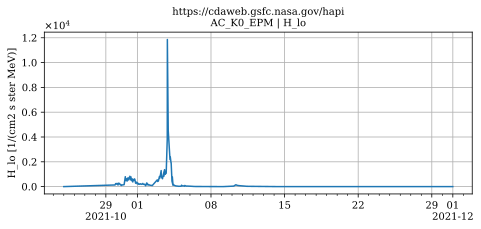

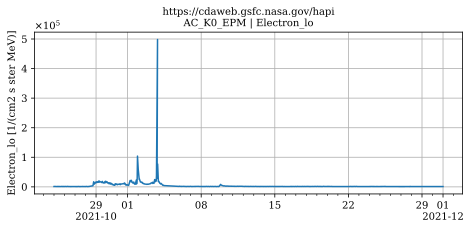

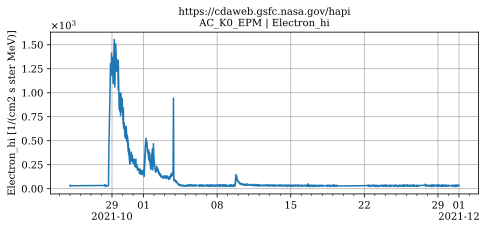

In [11]:
from hapiclient import hapi
from hapiplot import hapiplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
start      = '2021-10-25T00:00:00Z'
stop       = '2021-12-01T00:00:00Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

# ACE Electron, Proton, and Alpha Monitor
# https://cdaweb.gsfc.nasa.gov/registry/hdp/hapi/hapiHtml.html#url=https://cdaweb.gsfc.nasa.gov/hapi&id=AC_K0_EPM
dataset    = 'AC_K0_EPM'
parameters = 'H_lo,Electron_lo,Electron_hi'
data, meta = hapi(server, dataset, parameters, start, stop, **opts)
hapiplot(data, meta);

## <span style="background-color:yellow">Problem 02b</span>

Starting with the following script, find the average radial distance of the moon on the first 9 days of January of 2022. (To avoid 100+ users requesting data from the same data server, do not modify <code>start</code> and <code>stop</code>; the data required to solve this problem is locally cached and <code>hapi()</code> will use this cached data by default.)

In [12]:
from hapiclient import hapi

server     = 'https://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'moon'
parameters = 'X_GEO'
# Do not modify start/stop. See note above.
# HAPI stop dates/times are inclusive, so first returned timestamp could be on start.
start      = '2022-01-01T00:00:00.000Z'
# HAPI stop dates/times are exclusive, so last returned timestamp will be before stop.
stop       = '2022-01-10T00:00:00.000Z' 
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop, **opts);

data

# Your code here

array([(b'2022-001T00:00:00Z', -46.01434086),
       (b'2022-001T00:01:00Z', -45.91699812),
       (b'2022-001T00:02:00Z', -45.81885956), ...,
       (b'2022-009T23:57:00Z',   3.42931696),
       (b'2022-009T23:58:00Z',   3.16807861),
       (b'2022-009T23:59:00Z',   2.90678052)],
      dtype=[('Time', 'S18'), ('X_GEO', '<f8')])

# Convert to Pandas DataFrame

Conversion of a NumPy `ndarray` to a Pandas DataFrame can be made using [the `pandas.DataFrame` function.]((https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [13]:
from hapiclient import hapi
from hapiclient import hapitime2datetime

server     = 'http://hapi-server.org/servers/TestData2.0/hapi'
dataset    = 'dataset1'
parameters = 'scalar,vector'
start      = '1970-01-01T00:00:00Z'
stop       = '1970-01-01T00:00:10Z'
opts       = {'logging': False, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server,dataset,parameters,start,stop, **opts)

import pandas

# Put each parameter into a DataFrame
df_Time   = pandas.DataFrame(hapitime2datetime(data['Time']))
df_scalar = pandas.DataFrame(data['scalar'])
df_vector = pandas.DataFrame(data['vector'])

# Create DataFrame to hold all parameters
df = pandas.DataFrame()

# Place parameter DataFrames into single DataFrame
df = pandas.concat([df_Time, df_scalar, df_vector], axis=1)

# Name columns (more generally, one would want to obtain the column labels from information in the meta dict)
df.columns = ['Time', 'scalar','vector_x', 'vector_y', 'vector_z']

# Set Time to be index
df.set_index('Time', inplace=True)

df

,scalar,vector_x,vector_y,vector_z
Time,,,,
1970-01-01 00:00:00+00:00,0.000000,0.000000,-0.707107,-1.000000
1970-01-01 00:00:01+00:00,0.005236,0.005236,-0.703395,-0.999986
1970-01-01 00:00:02+00:00,0.010472,0.010472,-0.699663,-0.999945
1970-01-01 00:00:03+00:00,0.015707,0.015707,-0.695913,-0.999877
1970-01-01 00:00:04+00:00,0.020942,0.020942,-0.692143,-0.999781
1970-01-01 00:00:05+00:00,0.026177,0.026177,-0.688355,-0.999657
1970-01-01 00:00:06+00:00,0.031411,0.031411,-0.684547,-0.999507
1970-01-01 00:00:07+00:00,0.036644,0.036644,-0.680721,-0.999328
1970-01-01 00:00:08+00:00,0.041876,0.041876,-0.676876,-0.999123


## <span style="background-color:yellow">Problem 02c</span>

<a href="">Using [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), modify the code above to
 
1. find the mean and standard deviation of each column and
2. find the time that <code>scalar</code> is a maximum.


# Metadata

The metadata returned by `hapi()` is a straightforward mapping of the JSON metadata from a HAPI server.  Earlier we showed the metadata for a dataset; now we look at (a) creating a list of all HAPI servers and (b) asking any specific HAPI server which datasets it has available.

For more advanced use-cases, see [the metadata replated problems in HAPI_03.ipynb](HAPI_03.ipynb).

## Listing all Servers

HAPI has a query function to return all current HAPI servers, which is identical to the 
[Equivalent URL](https://github.com/hapi-server/data-specification/blob/master/servers.txt).

In [ ]:
from hapiclient import hapi

servers = hapi() # servers is an array of URLs
display(servers)

## Listing all Datasets from a Server

For a given server - in this example, CDAWeb - you can fetch the full list of dataset ids it serves. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/catalog](https://cdaweb.gsfc.nasa.gov/hapi/catalog).

In [ ]:
from hapiclient import hapi

server = 'https://cdaweb.gsfc.nasa.gov/hapi'
meta = hapi(server)

# Display first 5 entries
display(meta['catalog'][0:5])

## Listing all Parameters in a Dataset

Each dataset's metadata is available from a query, without needing to fetch the actual data. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI).

In [ ]:
from hapiclient import hapi

server  = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset = 'AC_H0_MFI'
meta = hapi(server, dataset)
display(meta)

## Listing Parameter Metadata

One can request a subset of metadata for dataset (rather than all parameters as in the last example) by adding `parameters` to the call. For this example, `hapi()` internally makes a request to [https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc](https://cdaweb.gsfc.nasa.gov/hapi/info?id=AC_H0_MFI&parameters=Magnitude,BGSEc).

(Note that HAPI allows non-standard server-specific keys in `meta`, which are prefixed by `x_`.  This is similar to the Python convention where variables and methods prefixed with an underscore indicate that they are for internal use only and may change.)

Here we fetch metadata for the `Magnitude` and `BGSEc` parameters in the `AC_H0_MFI` dataset from `CDAWeb`.

In [ ]:
from hapiclient import hapi

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'Magnitude,BGSEc'

meta = hapi(server,dataset,parameters)

display(meta)

## <span style="background-color:yellow">Problem 02d</span>


Starting with

```python
import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)

print(datasets[0:3])
# [{'id': 'ace', 'title': 'ACE', 'startDate': '1997-08-25T17:48:00.000Z', 'stopDate': '2022-07-04T23:48:00.000Z'}, {'id': 'active', 'title': 'Active', 'startDate': '1989-09-29T00:00:00.000Z', 'stopDate': '1991-10-04T08:00:00.000Z'}, {'id': 'aec', 'title': 'AE-C', 'startDate': '1973-12-17T08:01:00.000Z', 'stopDate': '1978-12-10T00:00:00.000Z'}]
```

use the information in `datasets` to create a table and plot as described in the following subsections. You should be able to do this without requesting additional information from a server.

(The information in `availability.pkl` was creating using `hapi()` [metadata calls](HAPI_02.ipynb#Metadata) to the SSCWeb HAPI server.)